# Indian Cars Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('indian_cars_cleaned.csv')

In [6]:
df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,carname
0,Tata,Nano Genx,Xt,292667,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,No,No,No,No,No,No,No,No,No,Tata-Nano Genx
1,Tata,Nano Genx,Xe,236447,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,No,No,No,No,No,No,No,No,No,Tata-Nano Genx
2,Tata,Nano Genx,Emax Xm,296661,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,No,No,No,No,No,No,No,No,No,Tata-Nano Genx
3,Tata,Nano Genx,Xta,334768,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,No,No,No,No,No,No,No,No,No,Tata-Nano Genx
4,Tata,Nano Genx,Xm,272223,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,No,No,No,No,No,No,No,No,No,Tata-Nano Genx


In [8]:
# Investigating primary columns relating to a superstore in the dataset

print('Dataset Shape: ', df.shape)
print()
print('Unique Car Makers:', df['Make'].unique().shape[0])
print()
print('Unique Car Models:', df['Model'].unique().shape[0])


Dataset Shape:  (1267, 134)

Unique Car Makers: 41

Unique Car Models: 263


## Statistical Exploration of Numeric Columns

In [10]:
df.describe()

,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Length,Width,Doors,City_Mileage,...,Gears,Ground_Clearance,Front_Track,Rear_Track,Seating_Capacity,Wheelbase,Boot_Space,Minimum_Turning_Radius,Gross_Vehicle_Weight,Number_of_Airbags
count,1.267000e+03,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1255.000000,1267.000000,1267.000000,...,1267.000000,1267.000000,1267.000000,1267.00000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000,1267.000000
mean,4.617330e+06,1853.103394,4.363852,3.979479,51.658958,1589.688118,4294.837127,1787.822984,4.548540,36.026890,...,5.802684,177.272297,1523.336069,1525.66693,5.256511,2630.510655,388.750987,10.821436,1828.180742,3.380426
std,1.218793e+07,1062.117689,1.625057,0.802576,16.050371,157.565493,477.682420,151.227266,0.748756,730.935791,...,1.166499,29.435736,81.123942,68.32810,1.137343,208.954058,158.900589,189.483643,422.712384,2.657761
min,2.364470e+05,72.000000,2.000000,1.000000,15.000000,1.845000,4.640000,1.845000,2.000000,2.000000,...,1.000000,100.000000,862.000000,1081.00000,2.000000,1840.000000,20.000000,3.500000,205.000000,0.000000
25%,7.405535e+05,1198.000000,4.000000,4.000000,41.000000,1495.000000,3991.000000,1695.000000,4.000000,14.000000,...,5.000000,165.000000,1520.000000,1525.00000,5.000000,2470.000000,300.000000,5.100000,1710.000000,2.000000
50%,1.055000e+06,1497.000000,4.000000,4.000000,46.000000,1555.000000,4329.000000,1770.000000,5.000000,15.100000,...,5.000000,170.000000,1520.000000,1525.00000,5.000000,2600.000000,378.000000,5.250000,1750.000000,2.000000
75%,2.991400e+06,1998.000000,4.000000,4.000000,60.000000,1660.000000,4620.000000,1850.000000,5.000000,16.000000,...,6.000000,185.000000,1520.000000,1525.00000,5.000000,2740.000000,460.000000,5.400000,1760.000000,6.000000
max,2.121554e+08,7993.000000,16.000000,16.000000,105.000000,2670.000000,6092.000000,2226.000000,5.000000,26032.000000,...,9.000000,498.000000,1985.000000,1700.00000,16.000000,3820.000000,1761.000000,6750.000000,3500.000000,14.000000


In [13]:
numeric_columns = df.select_dtypes(include=['int', 'float'])
numeric_columns

,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Length,Width,Doors,City_Mileage,...,Gears,Ground_Clearance,Front_Track,Rear_Track,Seating_Capacity,Wheelbase,Boot_Space,Minimum_Turning_Radius,Gross_Vehicle_Weight,Number_of_Airbags
0,292667,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.60,...,4.0,180.0,1325.0,1315.0,4.0,2230.0,110.0,4.0,1750.0,0.0
1,236447,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.60,...,4.0,180.0,1325.0,1315.0,4.0,2230.0,110.0,4.0,1750.0,0.0
2,296661,624.0,2.0,2.0,15.0,1652.0,3164.0,1750.0,4.0,15.10,...,4.0,180.0,1325.0,1315.0,4.0,2230.0,110.0,4.0,1750.0,0.0
3,334768,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.60,...,5.0,180.0,1325.0,1315.0,4.0,2230.0,94.0,4.0,1750.0,0.0
4,272223,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.60,...,4.0,180.0,1325.0,1315.0,4.0,2230.0,110.0,4.0,1750.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1302000,1498.0,4.0,4.0,40.0,1495.0,4440.0,1695.0,4.0,22.60,...,6.0,165.0,1475.0,1465.0,5.0,2600.0,510.0,5.3,1545.0,2.0
1263,1421000,1498.0,4.0,4.0,40.0,1495.0,4440.0,1695.0,4.0,22.60,...,6.0,165.0,1475.0,1465.0,5.0,2600.0,510.0,5.3,1550.0,6.0
1264,1431000,1497.0,4.0,4.0,40.0,1495.0,4440.0,1695.0,4.0,18.00,...,5.0,165.0,1475.0,1465.0,5.0,2600.0,510.0,5.3,1482.0,6.0
1265,1201000,1497.0,4.0,4.0,40.0,1495.0,4440.0,1695.0,4.0,14.30,...,5.0,165.0,1490.0,1480.0,5.0,2600.0,510.0,5.3,1455.0,2.0


### Heatmap of Numeric Columns

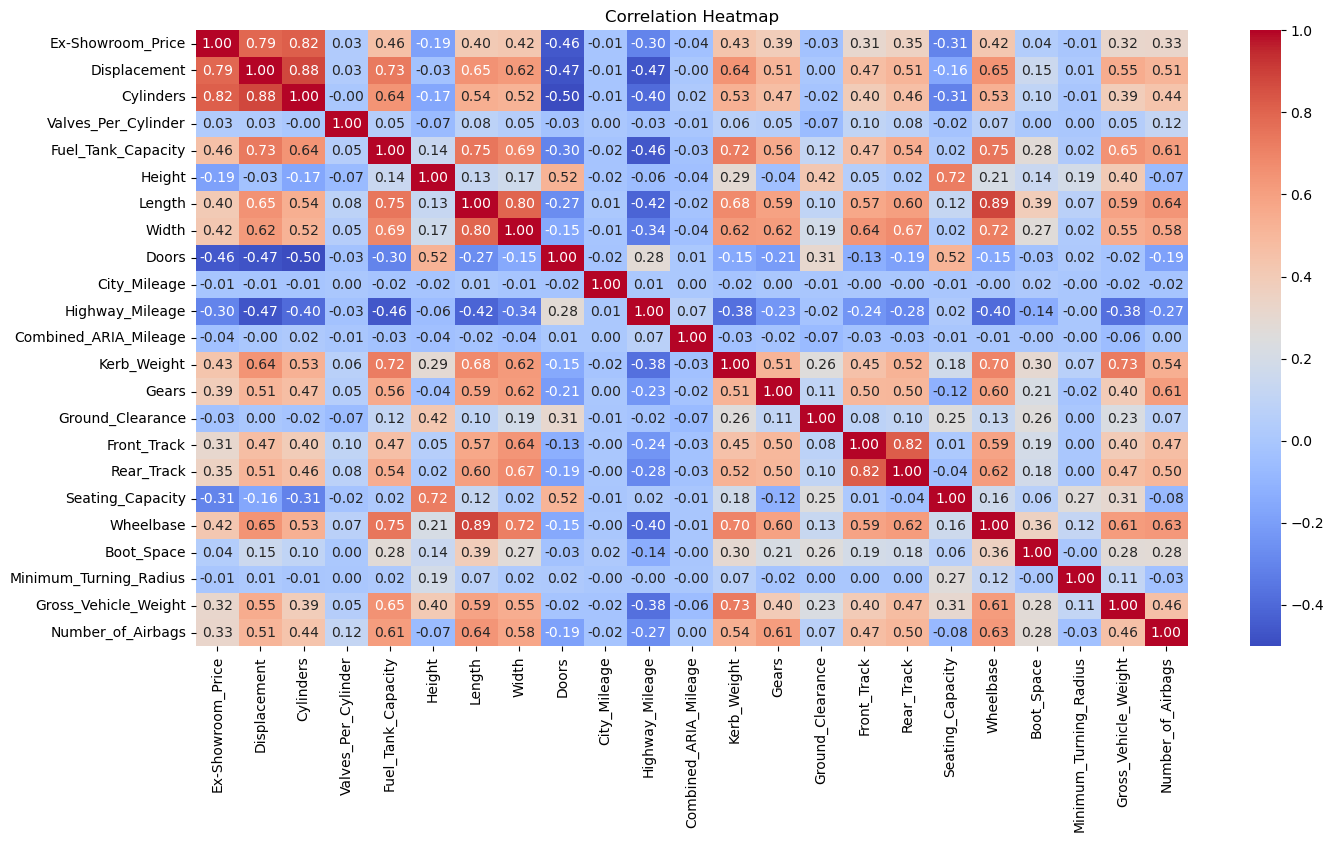

In [19]:

plt.figure(figsize=(16, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

- Highest overall correlation is between Length and Wheelbase (0.89)
- ExShowroom Price, Displacement and Cylinders exhibit correlation with each other.
- Lowest Correlation is between Doors and Valves per cylinder (-0.50)
- Doors and Mileage columns are mostly neutral or negatively correlated to the other columns

## Dividing the Cars into Price Categories for Visualisation

In [64]:
unique_cars = df.groupby(['carname', 'Variant'])['Ex-Showroom_Price'].mean().reset_index()

unique_cars = unique_cars.sort_values(by='Ex-Showroom_Price', ascending=True)

unique_cars

,carname,Variant,Ex-Showroom_Price
1065,Tata-Nano Genx,Xe,236447.0
34,Bajaj-Qute (Re60),Qcar,263000.0
1066,Tata-Nano Genx,Xm,272223.0
102,Datsun-Redi-Go,D,279650.0
757,Maruti Suzuki-Omni,5 Str Bs-Iv,282778.0
...,...,...,...
988,Rolls-Royce-Phantom Coupe,6.8 L,77312661.0
983,Rolls-Royce-Drophead Coupe,Phantom,83755383.0
987,Rolls-Royce-Phantom,Sedan,95000000.0
80,Bugatti-Chiron,W16,192142937.0


In [65]:
unique_cars.describe()

,Ex-Showroom_Price
count,1.267000e+03
mean,4.617330e+06
std,1.218793e+07
min,2.364470e+05
25%,7.405535e+05
50%,1.055000e+06
75%,2.991400e+06
max,2.121554e+08


Using the min and max values to create income ranges: 
| Group                   |  Range                                     |
|-------------------------|--------------------------------------------------------|
| Affordable              | 2,36,447 to 12,00,000                                  |
| Lower Midrange          | 12,00,000 to 20,00,000                                 |
| Upper Midrange          | 20,00,000 to 75,00,000                                 |
| Expensive               | 75,00,000 to 1,50,00,000                               |
| Very Expensive          | 1,50,00,000 to 21,21,55,400                              |


In [108]:
bins = [236447, 1200000, 2000000 , 7500000, 15000000, 212155400 ]
labels = ['Affordable', 'Lower Midrange', 'Upper Midrange', 'Expensive', 'Very Expensive']

unique_cars['Price_Category'] = pd.cut(unique_cars['Ex-Showroom_Price'], bins=bins, labels=labels, include_lowest=True)

unique_cars

,carname,Variant,Ex-Showroom_Price,Price_Category
1065,Tata-Nano Genx,Xe,236447.0,Affordable
34,Bajaj-Qute (Re60),Qcar,263000.0,Affordable
1066,Tata-Nano Genx,Xm,272223.0,Affordable
102,Datsun-Redi-Go,D,279650.0,Affordable
757,Maruti Suzuki-Omni,5 Str Bs-Iv,282778.0,Affordable
...,...,...,...,...
988,Rolls-Royce-Phantom Coupe,6.8 L,77312661.0,Very Expensive
983,Rolls-Royce-Drophead Coupe,Phantom,83755383.0,Very Expensive
987,Rolls-Royce-Phantom,Sedan,95000000.0,Very Expensive
80,Bugatti-Chiron,W16,192142937.0,Very Expensive


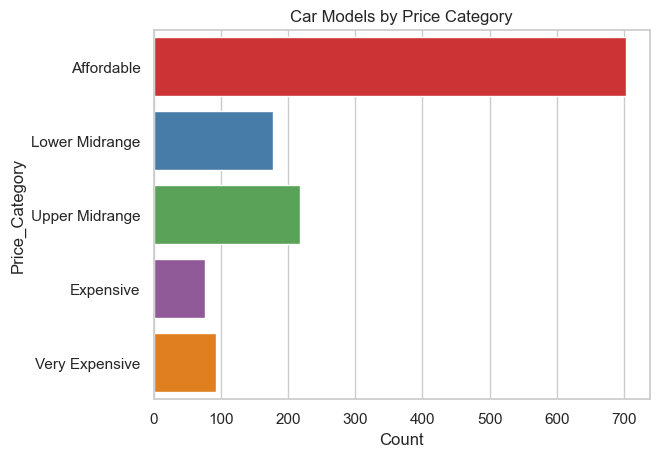

In [109]:
sns.countplot(y='Price_Category', data=unique_cars, palette='Set1')
plt.title('Car Models by Price Category')
plt.xlabel('Count')
plt.show()


Most of the cars fall under the Affordable category (INR 2,36,447 to 12,00,000) by a large gap from the Upper Midrange category (INR 20,00,000 to 75,00,000) which falls behind a little less than 500 counts. 

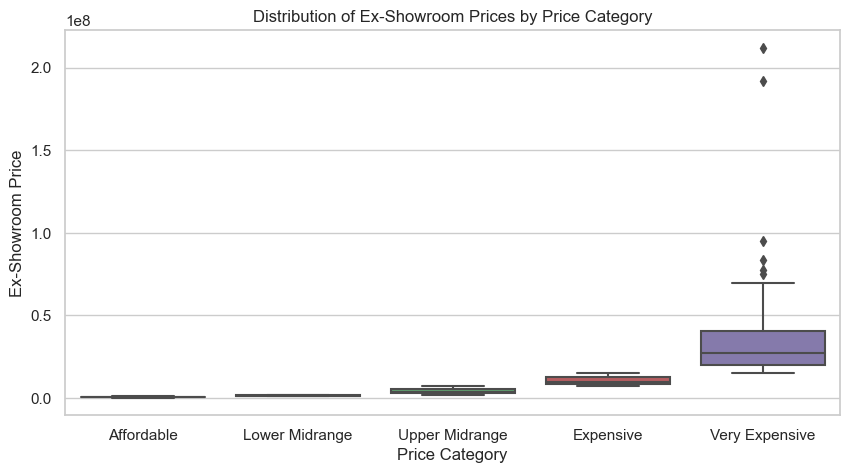

In [116]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Price_Category', y='Ex-Showroom_Price', data=unique_cars)
plt.title('Distribution of Ex-Showroom Prices by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Ex-Showroom Price')
plt.show()

Most of the outliers are in the Very Expensive category. This is a given considering how spread out the prices are in the luxury cars under this category.

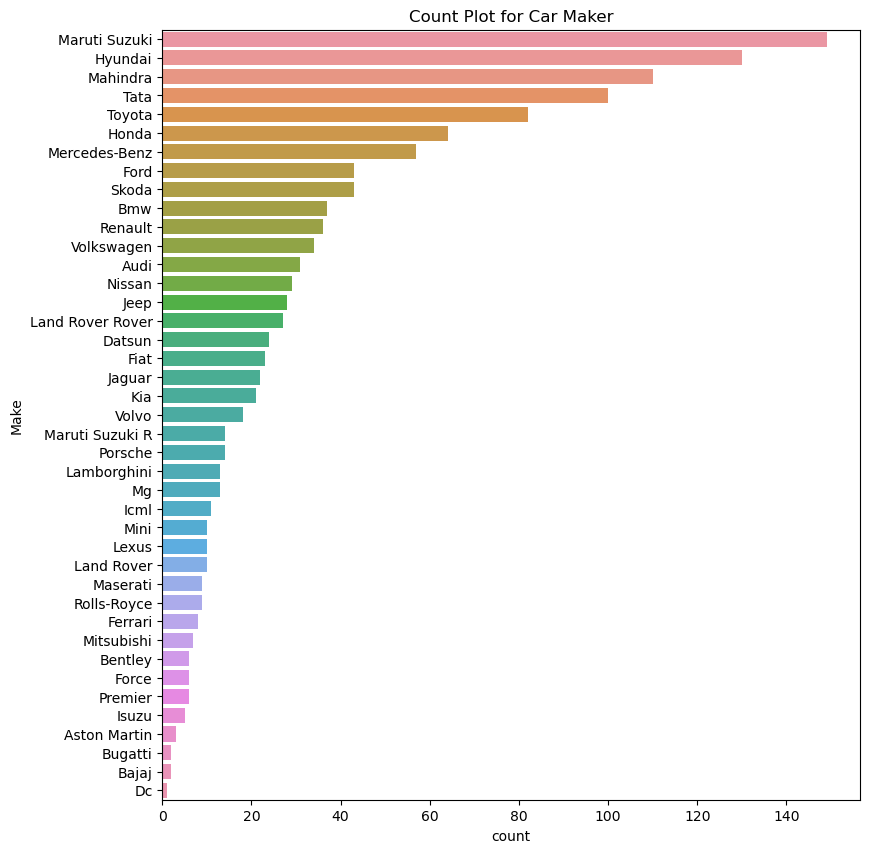

In [29]:
plt.figure(figsize=(9, 10))
sns.countplot(y='Make', data=df, order=df['Make'].value_counts().index)
plt.title('Count Plot for Car Maker')
plt.show()

- The Car Makers with the most models and variants in the market are depicted in the graph to be Maruti Suzuki (Indian-Japanese), Hyundai (Korean), Mahindra (Indian), Tata (Indian) and Toyota (Japanese). 
- The luxury and high-end car makers have less cars and models available.

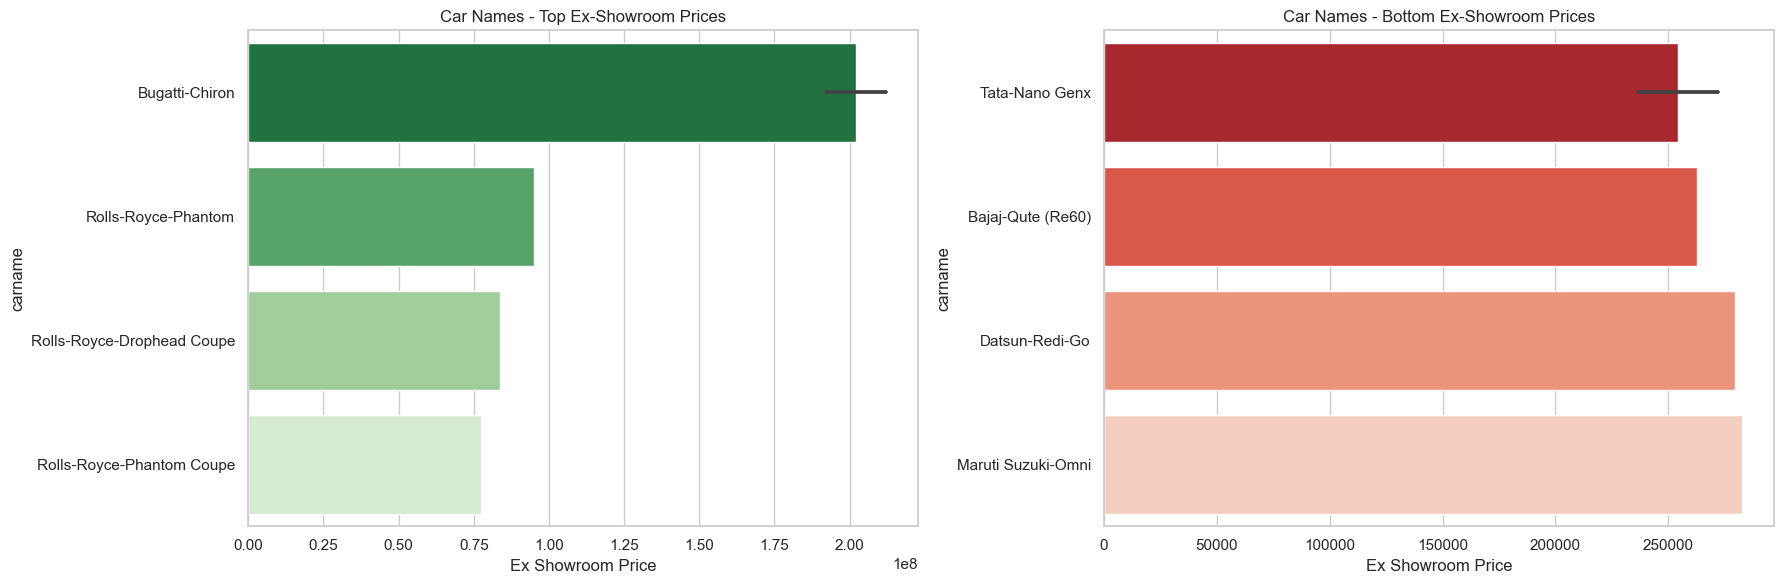

In [117]:
# Storing top  and bottom  in variables
top_5 = df.nlargest(5, 'Ex-Showroom_Price')
bottom_5 = df.nsmallest(5, 'Ex-Showroom_Price')

#creating sub plot visualisations
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Top 
sns.barplot(x='Ex-Showroom_Price', y='carname', data=top_5, ax=axes[0], palette='Greens_r')
axes[0].set_title('Car Names - Top Ex-Showroom Prices')
axes[0].set_xlabel('Ex Showroom Price')

# Bottom 
sns.barplot(x='Ex-Showroom_Price', y='carname', data=bottom_5, ax=axes[1], palette='Reds_r')
axes[1].set_title('Car Names - Bottom Ex-Showroom Prices')
axes[1].set_xlabel('Ex Showroom Price')

plt.tight_layout()
plt.show()

**The Top 5 Cars acc to Ex- Showroom Prices**
1. Bugatti Chiron
2. Rolls-Royce Phantom
3. Rolls-Royce Drophead Coupe
4. Rolls-Royce Phantom Coupe

**The Bottom 5 Cars acc to Ex- Showroom Prices**
1. Tata Nano Genx
2. Bajaj Qute (Re60)
3. Datsun Redi Go
4. Maruti Suzuki Omni

In [43]:
car_exprice = df.groupby(['Make', 'Model'])['Ex-Showroom_Price'].sum().reset_index()
fig = px.bar(car_exprice, x='Make', y='Ex-Showroom_Price', color='Model',
             title='Total Ex-Showroom Price by Car Maker and Model')

fig.update_layout(barmode='stack')
fig.show()

As shown in the plotply express graph, **the top car makers according to ex-showroom price are:**
1. Rolls-Royce
2. Mercedes-Benz
3. Lamborghini
4. Land Rover 
5. Bugatti

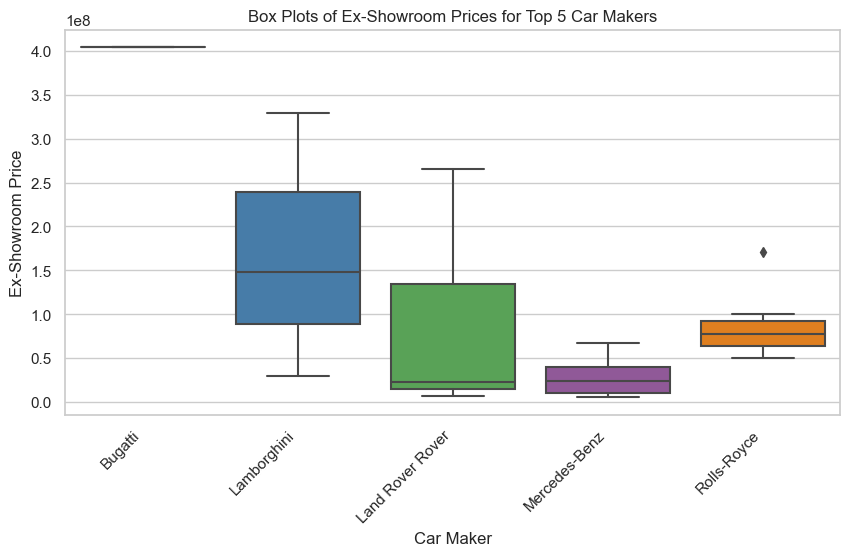

In [94]:
# Top 5 Car Makers Box Plots

top_5_makers = car_exprice.groupby('Make')['Ex-Showroom_Price'].sum().sort_values(ascending=False).head(5).index

top_5 = car_exprice[car_exprice['Make'].isin(top_5_makers)]


plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(x='Make', y='Ex-Showroom_Price', data=top_5, palette='Set1')
plt.title('Box Plots of Ex-Showroom Prices for Top 5 Car Makers')
plt.xlabel('Car Maker')
plt.ylabel('Ex-Showroom Price')
plt.xticks(rotation=45, ha='right')
plt.show()


## Histograms for Major Numerical Columns

Selecting a few major numerical columns that are relevant for car purchase decisions and plotting their distribution across the dataset

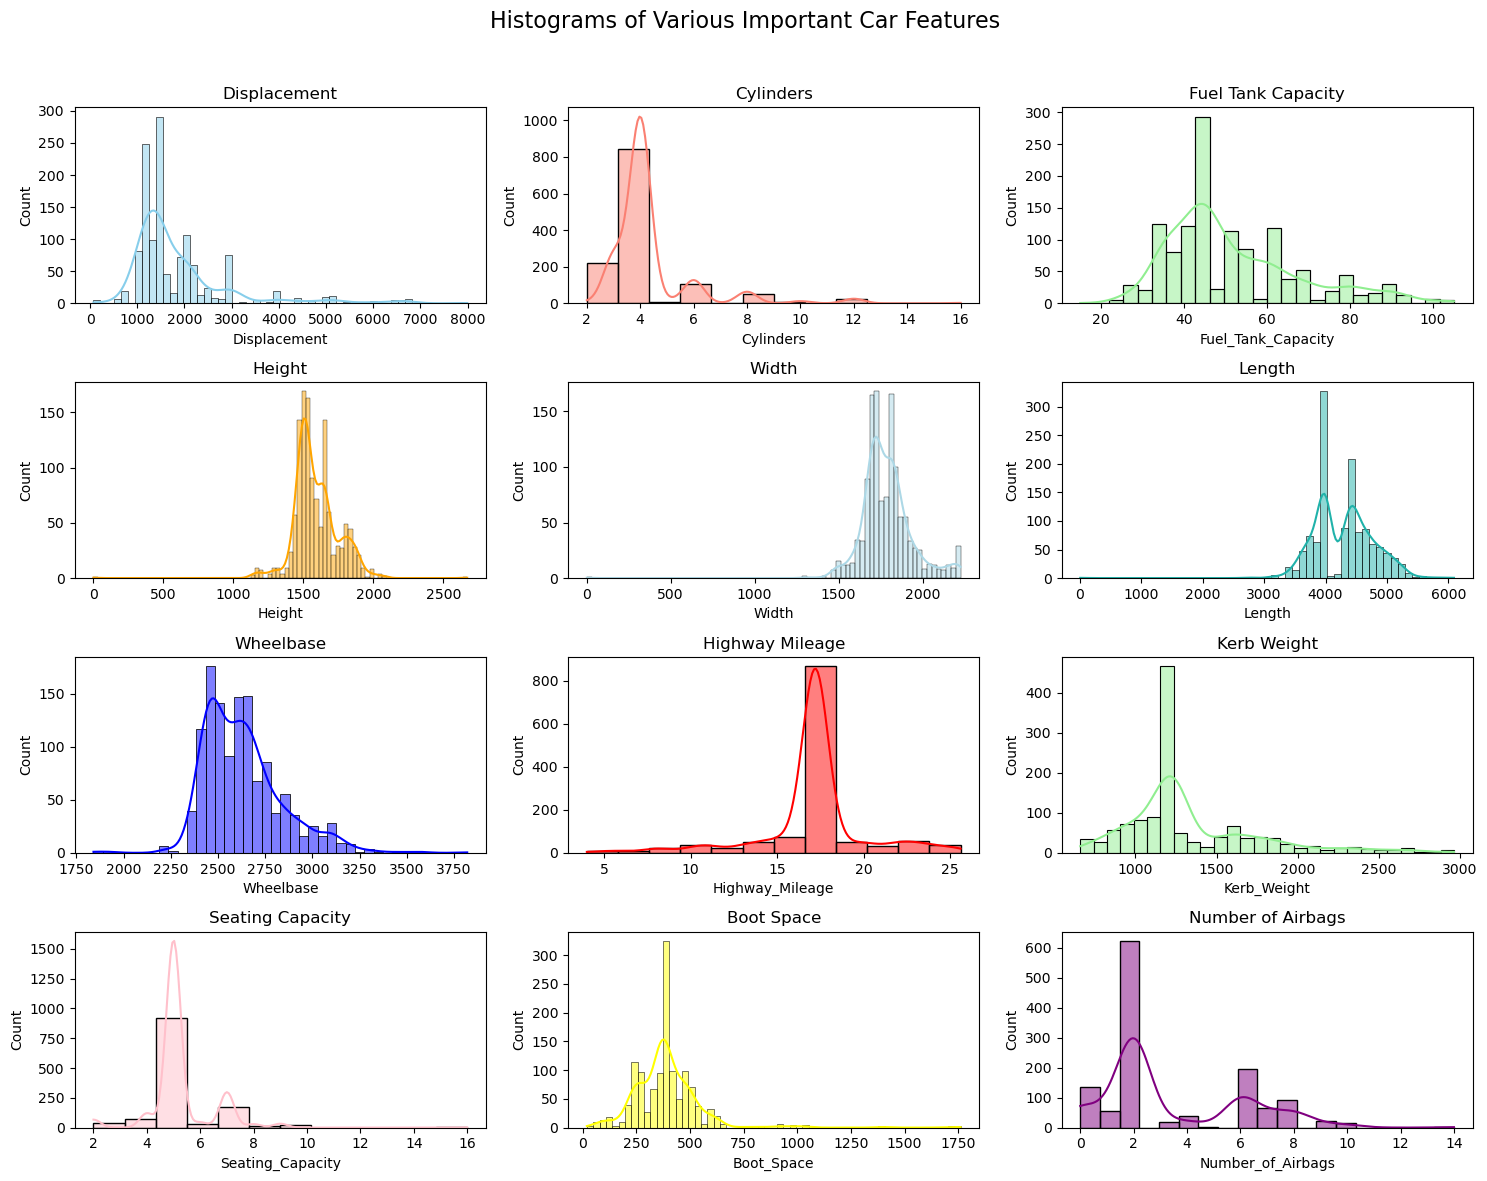

In [60]:
# Setting up subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Histograms of Various Important Car Features', fontsize=16)

# Plot for 'Displacement'
sns.histplot(df['Displacement'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Displacement')

# Plot for 'Cylinders'
sns.histplot(df['Cylinders'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Cylinders')

# Plot for 'Fuel_Tank_Capacity'
sns.histplot(df['Fuel_Tank_Capacity'], kde=True, ax=axes[0, 2], color='lightgreen')
axes[0, 2].set_title('Fuel Tank Capacity')

# Plot for 'Height'
sns.histplot(df['Height'], kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Height')

# Plot for 'Width'
sns.histplot(df['Width'], kde=True, ax=axes[1, 1], color='lightblue')
axes[1, 1].set_title('Width')

# Plot for 'Length'
sns.histplot(df['Length'], kde=True, ax=axes[1, 2], color='lightseagreen')
axes[1, 2].set_title('Length')

# Plot for 'City_Mileage'
sns.histplot(df['Wheelbase'], kde=True, ax=axes[2, 0], color='blue')
axes[2, 0].set_title('Wheelbase')

# Plot for 'Highway_Mileage'
sns.histplot(df['Highway_Mileage'], kde=True, ax=axes[2, 1], color='red')
axes[2, 1].set_title('Highway Mileage')

# Plot for 'Kerb_Weight'
sns.histplot(df['Kerb_Weight'], kde=True, ax=axes[2, 2], color='lightgreen')
axes[2, 2].set_title('Kerb Weight')

# Plot for 'Seating_Capacity'
sns.histplot(df['Seating_Capacity'], kde=True, ax=axes[3, 0], color='pink')
axes[3, 0].set_title('Seating Capacity')

# Plot for 'Boot_Space'
sns.histplot(df['Boot_Space'], kde=True, ax=axes[3, 1], color='yellow')
axes[3, 1].set_title('Boot Space')

# Plot for 'Number_of_Airbags'
sns.histplot(df['Number_of_Airbags'], kde=True, ax=axes[3, 2], color='purple')
axes[3, 2].set_title('Number of Airbags')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Extra features - how many cars have them?
The yes/no columns contain many extra features that are spread across the dataset.

Plotting pie charts to see which columns are present in what percentage of cars

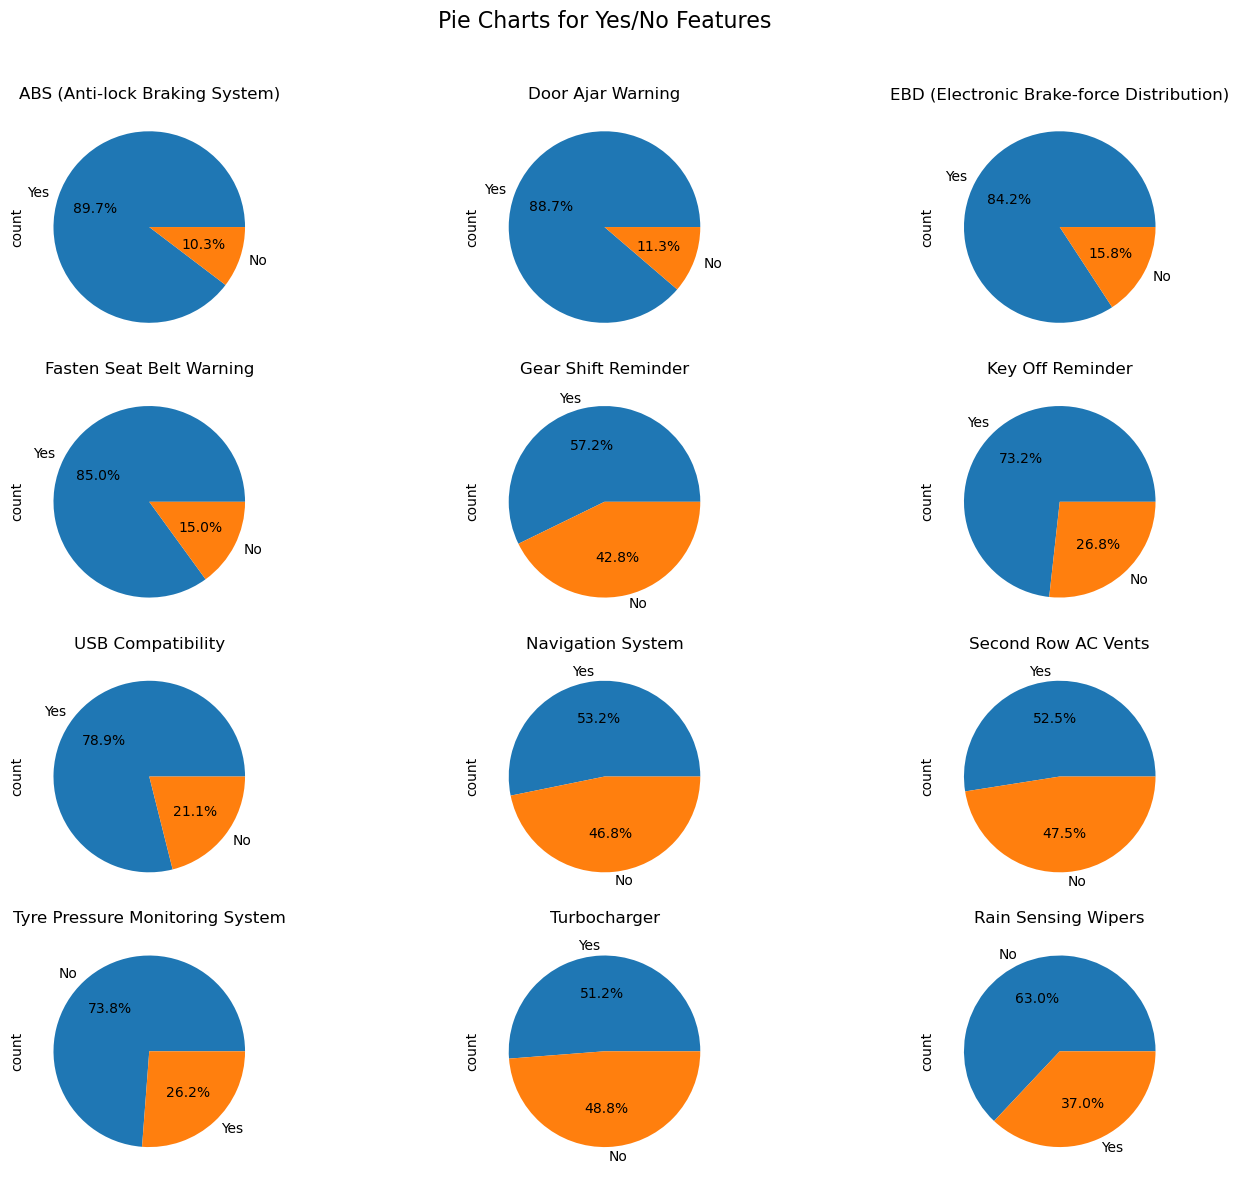

In [53]:

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Pie Charts for Extra Features', fontsize=16)

# Plot for "ABS_(Anti-lock_Braking_System)"
df['ABS_(Anti-lock_Braking_System)'].value_counts().plot.pie(ax=axes[0, 0], autopct='%1.1f%%')
axes[0, 0].set_title('ABS (Anti-lock Braking System)')

# Plot for "Door_Ajar_Warning"
df['Door_Ajar_Warning'].value_counts().plot.pie(ax=axes[0, 1], autopct='%1.1f%%')
axes[0, 1].set_title('Door Ajar Warning')

# Plot for "EBD_(Electronic_Brake-force_Distribution)"
df['EBD_(Electronic_Brake-force_Distribution)'].value_counts().plot.pie(ax=axes[0, 2], autopct='%1.1f%%')
axes[0, 2].set_title('EBD (Electronic Brake-force Distribution)')

# Plot for "Fasten_Seat_Belt_Warning"
df['Fasten_Seat_Belt_Warning'].value_counts().plot.pie(ax=axes[1, 0], autopct='%1.1f%%')
axes[1, 0].set_title('Fasten Seat Belt Warning')

# Plot for "Gear_Shift_Reminder"
df['Gear_Shift_Reminder'].value_counts().plot.pie(ax=axes[1, 1], autopct='%1.1f%%')
axes[1, 1].set_title('Gear Shift Reminder')

# Plot for "Key_Off_Reminder"
df['Key_Off_Reminder'].value_counts().plot.pie(ax=axes[1, 2], autopct='%1.1f%%')
axes[1, 2].set_title('Key Off Reminder')

# Plot for "USB_Compatibility"
df['USB_Compatibility'].value_counts().plot.pie(ax=axes[2, 0], autopct='%1.1f%%')
axes[2, 0].set_title('USB Compatibility')

# Plot for "Navigation_System"
df['Navigation_System'].value_counts().plot.pie(ax=axes[2, 1], autopct='%1.1f%%')
axes[2, 1].set_title('Navigation System')

# Plot for "Second_Row_AC_Vents"
df['Second_Row_AC_Vents'].value_counts().plot.pie(ax=axes[2, 2], autopct='%1.1f%%')
axes[2, 2].set_title('Second Row AC Vents')

# Plot for "Tyre_Pressure_Monitoring_System"
df['Tyre_Pressure_Monitoring_System'].value_counts().plot.pie(ax=axes[3, 0], autopct='%1.1f%%')
axes[3, 0].set_title('Tyre Pressure Monitoring System')

# Plot for "Turbocharger"
df['Turbocharger'].value_counts().plot.pie(ax=axes[3, 1], autopct='%1.1f%%')
axes[3, 1].set_title('Turbocharger')

# Plot for "Rain_Sensing_Wipers"
df['Rain_Sensing_Wipers'].value_counts().plot.pie(ax=axes[3, 2], autopct='%1.1f%%')
axes[3, 2].set_title('Rain Sensing Wipers')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


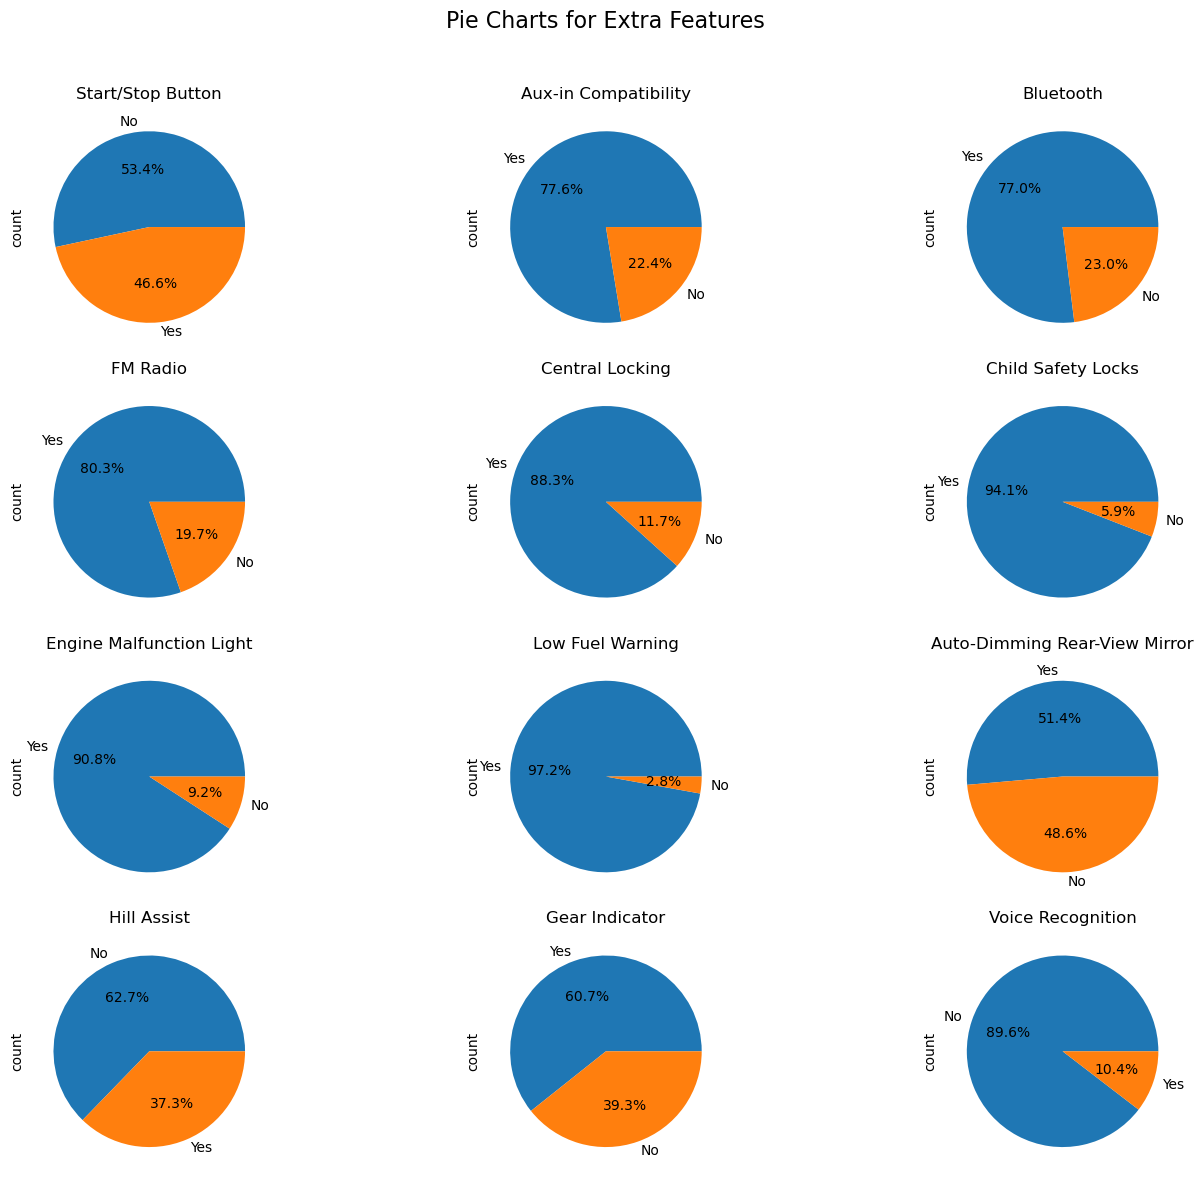

In [59]:
# Set up subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Pie Charts for Extra Features', fontsize=16)

# Plot for "Start_/_Stop_Button"
df['Start_/_Stop_Button'].value_counts().plot.pie(ax=axes[0, 0], autopct='%1.1f%%')
axes[0, 0].set_title('Start/Stop Button')

# Plot for "Aux-in_Compatibility"
df['Aux-in_Compatibility'].value_counts().plot.pie(ax=axes[0, 1], autopct='%1.1f%%')
axes[0, 1].set_title('Aux-in Compatibility')

# Plot for "Bluetooth"
df['Bluetooth'].value_counts().plot.pie(ax=axes[0, 2], autopct='%1.1f%%')
axes[0, 2].set_title('Bluetooth')

# Plot for "FM_Radio"
df['FM_Radio'].value_counts().plot.pie(ax=axes[1, 0], autopct='%1.1f%%')
axes[1, 0].set_title('FM Radio')

# Plot for "Central_Locking"
df['Central_Locking'].value_counts().plot.pie(ax=axes[1, 1], autopct='%1.1f%%')
axes[1, 1].set_title('Central Locking')

# Plot for "Child_Safety_Locks"
df['Child_Safety_Locks'].value_counts().plot.pie(ax=axes[1, 2], autopct='%1.1f%%')
axes[1, 2].set_title('Child Safety Locks')

# Plot for "Engine_Malfunction_Light"
df['Engine_Malfunction_Light'].value_counts().plot.pie(ax=axes[2, 0], autopct='%1.1f%%')
axes[2, 0].set_title('Engine Malfunction Light')

# Plot for "Low_Fuel_Warning"
df['Low_Fuel_Warning'].value_counts().plot.pie(ax=axes[2, 1], autopct='%1.1f%%')
axes[2, 1].set_title('Low Fuel Warning')

# Plot for "Auto-Dimming_Rear-View_Mirror"
df['Auto-Dimming_Rear-View_Mirror'].value_counts().plot.pie(ax=axes[2, 2], autopct='%1.1f%%')
axes[2, 2].set_title('Auto-Dimming Rear-View Mirror')

# Plot for "Hill_Assist"
df['Hill_Assist'].value_counts().plot.pie(ax=axes[3, 0], autopct='%1.1f%%')
axes[3, 0].set_title('Hill Assist')

# Plot for "Gear_Indicator"
df['Gear_Indicator'].value_counts().plot.pie(ax=axes[3, 1], autopct='%1.1f%%')
axes[3, 1].set_title('Gear Indicator')

# Plot for "Voice_Recognition"
df['Voice_Recognition'].value_counts().plot.pie(ax=axes[3, 2], autopct='%1.1f%%')
axes[3, 2].set_title('Voice Recognition')


# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
